<a href="https://colab.research.google.com/github/ImeCMR/Random-Forest/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Buyers

This dataset has details of 1000 users from different backgrounds and whether or not they buy a bike. This data can be used for prediction models using Machine Learning Algorithms.

Columns -

ID
Marital Status
Gender
Income
Children
Education
Occupation
Home Owner
Cars
Commute Distance
Region
Age
Purchased Bike


Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

Importing the CSV file and readin the file

In [ ]:
datafile =  pd.read_csv('https://raw.githubusercontent.com/iMeshCMR/Machine_Learning/main/Bike_Buyers%20_data.csv', sep=",")
print(datafile.head())

      ID Marital_Status  Gender  Income  Children        Education  \
0  12496        Married  Female   40000       1.0        Bachelors   
1  24107        Married    Male   30000       3.0  Partial College   
2  14177        Married    Male   80000       5.0  Partial College   
3  24381         Single  Female   70000       0.0        Bachelors   
4  25597         Single    Male   30000       0.0        Bachelors   

       Occupation Home_Owner  Cars Commute Distance   Region   Age  \
0  Skilled Manual        Yes   0.0        0-1 Miles   Europe  42.0   
1        Clerical        Yes   1.0        0-1 Miles   Europe  43.0   
2    Professional         No   2.0        2-5 Miles   Europe  60.0   
3    Professional        Yes   1.0       5-10 Miles  Pacific  41.0   
4        Clerical         No   0.0        0-1 Miles   Europe  36.0   

  Purchased_Bike  
0             No  
1             No  
2             No  
3            Yes  
4            Yes  


Decribing the data file

In [ ]:
datafile.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.00000,992.000000,991.000000,992.000000
mean,19965.992000,56210.00000,1.910282,1.455096,44.181452
std,5347.333948,30995.10601,1.626910,1.121755,11.362007
min,11000.000000,10000.00000,0.000000,0.000000,25.000000
25%,15290.750000,30000.00000,0.000000,1.000000,35.000000
50%,19744.000000,60000.00000,2.000000,1.000000,43.000000
75%,24470.750000,70000.00000,3.000000,2.000000,52.000000
max,29447.000000,170000.00000,5.000000,4.000000,89.000000


View statistical properties of the datafile
Checking whether there is any missing values in the datafile

In [ ]:
datafile.isnull().sum()

,0
ID,0
Marital_Status,0
Gender,0
Income,0
Children,8
Education,0
Occupation,0
Home_Owner,0
Cars,9
Commute Distance,0


Checking all the column names

In [ ]:
datafile.columns

Index(['ID', 'Marital_Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home_Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased_Bike'],
      dtype='object')

Drop useless data

In [ ]:
#Because there are some string values that cant be cateorised
datafile=datafile.drop(['ID','Income','Children','Cars','Commute Distance','Region','Age'], axis=1)
datafile.head()

,Marital_Status,Gender,Education,Occupation,Home_Owner,Purchased_Bike
0,Married,Female,Bachelors,Skilled Manual,Yes,No
1,Married,Male,Partial College,Clerical,Yes,No
2,Married,Male,Partial College,Professional,No,No
3,Single,Female,Bachelors,Professional,Yes,Yes
4,Single,Male,Bachelors,Clerical,No,Yes


View categorical varibales

In [ ]:
Categorical = [var for var in datafile.columns if datafile[var].dtype=='O']
datafile[Categorical].head()

,Marital_Status,Gender,Education,Occupation,Home_Owner,Purchased_Bike
0,Married,Female,Bachelors,Skilled Manual,Yes,No
1,Married,Male,Partial College,Clerical,Yes,No
2,Married,Male,Partial College,Professional,No,No
3,Single,Female,Bachelors,Professional,Yes,Yes
4,Single,Male,Bachelors,Clerical,No,Yes


Checking the distribution of the data set

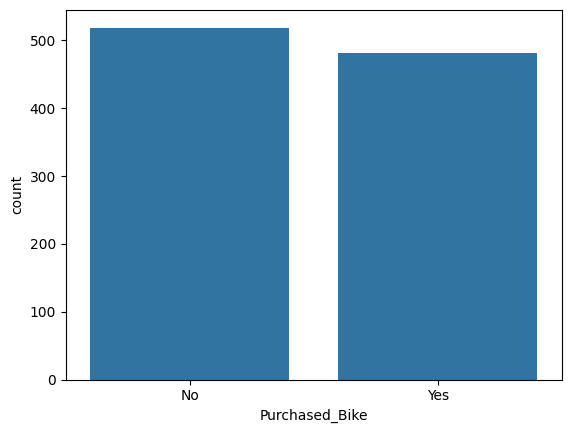

In [ ]:
#Here dependent data will mainly focused
datafile.Purchased_Bike.value_counts()
sns.countplot(x="Purchased_Bike", data=datafile)
plt.show()

Checking all the unique categories in Education and Occupation before turn into numerical

In [ ]:
datafile.Education.unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [ ]:
datafile.Occupation.unique()

array(['Skilled Manual', 'Clerical', 'Professional', 'Manual',
       'Management'], dtype=object)

Assining vlues in the Purchased_Bike column to numerical values

In [ ]:
scale_mapper_Education = {'Bachelors':1, 'Partial College':2, 'High School':3,
       'Partial High School':4, 'Graduate Degree':5}
scale_mapper_Occupation = {'Skilled Manual':1, 'Clerical':2, 'Professional':3, 'Manual':4,
       'Management':5}
scale_mapper_Marital_Status = {"Married":1,"Single":0}
scale_mapper_Gender	 = {"Male":1,"Female":0}
scale_mapper_Home_Owner = {"Yes":1,"No":0}
scale_mapper_Purchased_Bike = {"Yes":1,"No":0}

datafile["Education_N"] = datafile["Education"].replace(scale_mapper_Education)
datafile["Occupation_N"] = datafile["Occupation"].replace(scale_mapper_Occupation)
datafile["Marital_Status_N"] = datafile["Marital_Status"].replace(scale_mapper_Marital_Status)
datafile["Gender_N"] = datafile["Gender"].replace(scale_mapper_Gender)
datafile["Home_Owner_N"] = datafile["Home_Owner"].replace(scale_mapper_Home_Owner)
datafile["Purchased_Bike_N"] = datafile["Purchased_Bike"].replace(scale_mapper_Purchased_Bike)

print(datafile.head())

  Marital_Status  Gender        Education      Occupation Home_Owner  \
0        Married  Female        Bachelors  Skilled Manual        Yes   
1        Married    Male  Partial College        Clerical        Yes   
2        Married    Male  Partial College    Professional         No   
3         Single  Female        Bachelors    Professional        Yes   
4         Single    Male        Bachelors        Clerical         No   

  Purchased_Bike  Education_N  Occupation_N  Marital_Status_N  Gender_N  \
0             No            1             1                 1         0   
1             No            2             2                 1         1   
2             No            2             3                 1         1   
3            Yes            1             3                 0         0   
4            Yes            1             2                 0         1   

   Home_Owner_N  Purchased_Bike_N  
0             1                 0  
1             1                 0  
2       

Droping Buying which is not numerical ........... there's the column that converted to numerical
(Class_value_num)

In [ ]:
datafile=datafile.drop(["Education"], axis=1)
datafile=datafile.drop(["Occupation"], axis=1)
datafile=datafile.drop(["Marital_Status"], axis=1)
datafile=datafile.drop(["Gender"], axis=1)
datafile=datafile.drop(["Home_Owner"], axis=1)
datafile=datafile.drop(["Purchased_Bike"], axis=1)
datafile.head()


,Education_N,Occupation_N,Marital_Status_N,Gender_N,Home_Owner_N,Purchased_Bike_N
0,1,1,1,0,1,0
1,2,2,1,1,1,0
2,2,3,1,1,0,0
3,1,3,0,0,1,1
4,1,2,0,1,0,1


 Splitting data set to train and test the accuracy later

In [ ]:
from sklearn.model_selection import train_test_split
y = datafile.Purchased_Bike_N.values
x_data = datafile.drop(['Purchased_Bike_N'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=0) #20% for the test size
x_train

,Education_N,Occupation_N,Marital_Status_N,Gender_N,Home_Owner_N
687,2,1,0,1,1
500,1,3,1,1,1
332,4,4,0,0,0
979,3,1,0,1,1
817,5,3,1,0,1
...,...,...,...,...,...
835,1,1,0,0,1
192,1,5,0,0,1
629,5,1,1,0,1
559,1,5,0,0,1


Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DisTrClass = DecisionTreeClassifier()
DisTrClass.fit(x_train, y_train)

DecisionTreeClassifier()

Acuracy od Decision tree

In [ ]:
DisTrClass.score(x_test, y_test)*100

57.49999999999999

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandForClass = RandomForestClassifier()
RandForClass.fit(x_train, y_train)

RandomForestClassifier()

Checking acuracy of Random Forest

In [ ]:
RandForClass.score(x_test, y_test)*100

62.0

Develop confusion matrix

In [ ]:
y_DisTrClass = DisTrClass.predict(x_test)
y_RandForClass = RandForClass.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

CM_DisTrClass = confusion_matrix(y_test,y_DisTrClass)
CM_RandForClass = confusion_matrix(y_test,y_RandForClass)

<Axes: title={'center': 'Decision Tree Classifier Confusion Matrix'}>

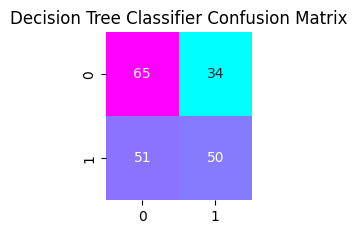

In [ ]:
plt.subplot(2,3,1)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(CM_DisTrClass,annot=True,cmap="cool",fmt="d",cbar=False)

<Axes: title={'center': 'Random Forest Confusion Matrix'}>

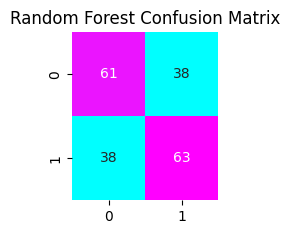

In [ ]:
plt.subplot(2,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(CM_RandForClass,annot=True,cmap="cool",fmt="d",cbar=False)